<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/Copy_of_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier


In [2]:
from google.colab import files
files.upload()


Saving dyscalculia_dataset (1).csv to dyscalculia_dataset (1).csv


{'dyscalculia_dataset (1).csv': b'child_name,age,gender,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,activity6_score,activity6_time,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label\r\nAbiban,8,Male,1,3,-1,3,1,2,1,4,1,1,-1,3,-1,2,-1,2,-1,2,0.444,0,-3,mild\r\nAbibath,8,Male,1,4,-1,3,1,2,1,2,1,2,-1,3,-1,3,-1,1,-1,3,0.444,0,-3,mild\r\nAbinada,8,Male,1,18,-1,13,1,7,1,11,1,6,-1,15,0,0,-1,9,-1,6,0.444,0.111,-3,mild\r\nAnanya,8,Female,1,4,1,5,-1,5,1,4,1,3,-1,4,0,0,-1,4,-1,4,0.444,0.111,-1,mild\r\nDeshan,8,Male,1,4,1,2,1,4,1,2,1,3,1,5,0,0,1,2,1,8,0.889,0.111,3,no\r\nDihas,8,Male,1,9,-1,11,-1,7,-1,9,0,0,0,0,0,0,0,0,-1,22,0.111,0.444,-2,high\r\nDilakshi,8,Male,1,1,-1,1,1,1,1,1,1,0,-1,1,0,0,1,0,1,1,0.667,0.111,-1,mild\r\nGagul,7,Male,1,20,-1,23,1,11,-1,16,-1,17,-1,28,0,0,-1,14,-1,40,0.222,0.111,-3

In [3]:
import os
os.listdir()


['.config', 'dyscalculia_dataset (1).csv', 'sample_data']

In [4]:
import pandas as pd

df = pd.read_csv("dyscalculia_dataset (1).csv")
df.head()


,child_name,age,gender,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,Abiban,8,Male,1,3,-1,3,1,2,1,...,-1,2,-1,2,-1,2,0.444,0.000,-3,mild
1,Abibath,8,Male,1,4,-1,3,1,2,1,...,-1,3,-1,1,-1,3,0.444,0.000,-3,mild
2,Abinada,8,Male,1,18,-1,13,1,7,1,...,0,0,-1,9,-1,6,0.444,0.111,-3,mild
3,Ananya,8,Female,1,4,1,5,-1,5,1,...,0,0,-1,4,-1,4,0.444,0.111,-1,mild
4,Deshan,8,Male,1,4,1,2,1,4,1,...,0,0,1,2,1,8,0.889,0.111,3,no


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   child_name        209 non-null    object 
 1   age               209 non-null    int64  
 2   gender            209 non-null    object 
 3   activity1_score   209 non-null    int64  
 4   activity1_time    209 non-null    int64  
 5   activity2_score   209 non-null    int64  
 6   activity2_time    209 non-null    int64  
 7   activity3_score   209 non-null    int64  
 8   activity3_time    209 non-null    int64  
 9   activity4_score   209 non-null    int64  
 10  activity4_time    209 non-null    int64  
 11  activity5_score   209 non-null    int64  
 12  activity5_time    209 non-null    int64  
 13  activity6_score   209 non-null    int64  
 14  activity6_time    209 non-null    int64  
 15  activity7_score   209 non-null    int64  
 16  activity7_time    209 non-null    int64  
 1

,age,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,...,activity6_time,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score
count,209.000000,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,8.009569,0.693780,8.62201,-0.220096,11.717703,0.382775,7.177033,0.478469,7.746411,0.521531,...,12.023923,0.244019,5.516746,0.071770,8.913876,0.028708,13.435407,0.542208,0.097761,-0.464115
std,0.596387,0.687813,8.92413,0.945321,12.818696,0.880827,8.001938,0.838248,9.267800,0.826697,...,11.463336,0.702177,10.359915,0.970536,11.580498,0.989920,13.055609,0.292234,0.114232,1.896329
min,7.000000,-1.000000,0.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-3.000000
25%,8.000000,1.000000,4.00000,-1.000000,4.000000,-1.000000,3.000000,0.000000,3.000000,0.000000,...,4.000000,0.000000,0.000000,-1.000000,3.000000,-1.000000,5.000000,0.222000,0.000000,-2.000000
50%,8.000000,1.000000,6.00000,-1.000000,8.000000,1.000000,6.000000,1.000000,6.000000,1.000000,...,9.000000,0.000000,2.000000,1.000000,6.000000,1.000000,9.000000,0.666667,0.111000,-1.000000
75%,8.000000,1.000000,10.00000,1.000000,16.000000,1.000000,8.000000,1.000000,8.000000,1.000000,...,15.000000,1.000000,7.000000,1.000000,9.000000,1.000000,18.000000,0.777778,0.111111,1.000000
max,9.000000,1.000000,57.00000,1.000000,86.000000,1.000000,50.000000,1.000000,59.000000,1.000000,...,56.000000,1.000000,62.000000,1.000000,57.000000,1.000000,74.000000,1.000000,0.556000,3.000000


In [6]:
print(df.isnull().sum())

# If any missing values exist
df = df.fillna(df.median(numeric_only=True))


child_name          0
age                 0
gender              0
activity1_score     0
activity1_time      0
activity2_score     0
activity2_time      0
activity3_score     0
activity3_time      0
activity4_score     0
activity4_time      0
activity5_score     0
activity5_time      0
activity6_score     0
activity6_time      0
activity7_score     0
activity7_time      0
activity8_score     0
activity8_time      0
activity9_score     0
activity9_time      0
accuracy_rate       0
skipped_rate        0
difficulty_score    0
label               0
dtype: int64


In [7]:
df.head()

,child_name,age,gender,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,Abiban,8,Male,1,3,-1,3,1,2,1,...,-1,2,-1,2,-1,2,0.444,0.000,-3,mild
1,Abibath,8,Male,1,4,-1,3,1,2,1,...,-1,3,-1,1,-1,3,0.444,0.000,-3,mild
2,Abinada,8,Male,1,18,-1,13,1,7,1,...,0,0,-1,9,-1,6,0.444,0.111,-3,mild
3,Ananya,8,Female,1,4,1,5,-1,5,1,...,0,0,-1,4,-1,4,0.444,0.111,-1,mild
4,Deshan,8,Male,1,4,1,2,1,4,1,...,0,0,1,2,1,8,0.889,0.111,3,no


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("dyscalculia_dataset (1).csv")

# Drop unwanted columns
df = df.drop(columns=['child_name', 'age', 'gender', ])

# Check result
df.head()


,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,1,3,-1,3,1,2,1,4,1,1,...,-1,2,-1,2,-1,2,0.444,0.000,-3,mild
1,1,4,-1,3,1,2,1,2,1,2,...,-1,3,-1,1,-1,3,0.444,0.000,-3,mild
2,1,18,-1,13,1,7,1,11,1,6,...,0,0,-1,9,-1,6,0.444,0.111,-3,mild
3,1,4,1,5,-1,5,1,4,1,3,...,0,0,-1,4,-1,4,0.444,0.111,-1,mild
4,1,4,1,2,1,4,1,2,1,3,...,0,0,1,2,1,8,0.889,0.111,3,no


In [11]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [12]:
label_map = {"no": 0, "mild": 1, "high": 2}
df["label"] = df["label"].map(label_map)


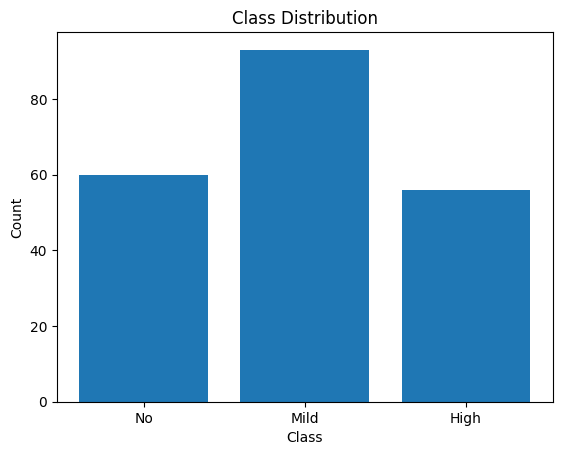

In [13]:
class_counts = df["label"].value_counts().sort_index()

plt.bar(["No", "Mild", "High"], class_counts)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()


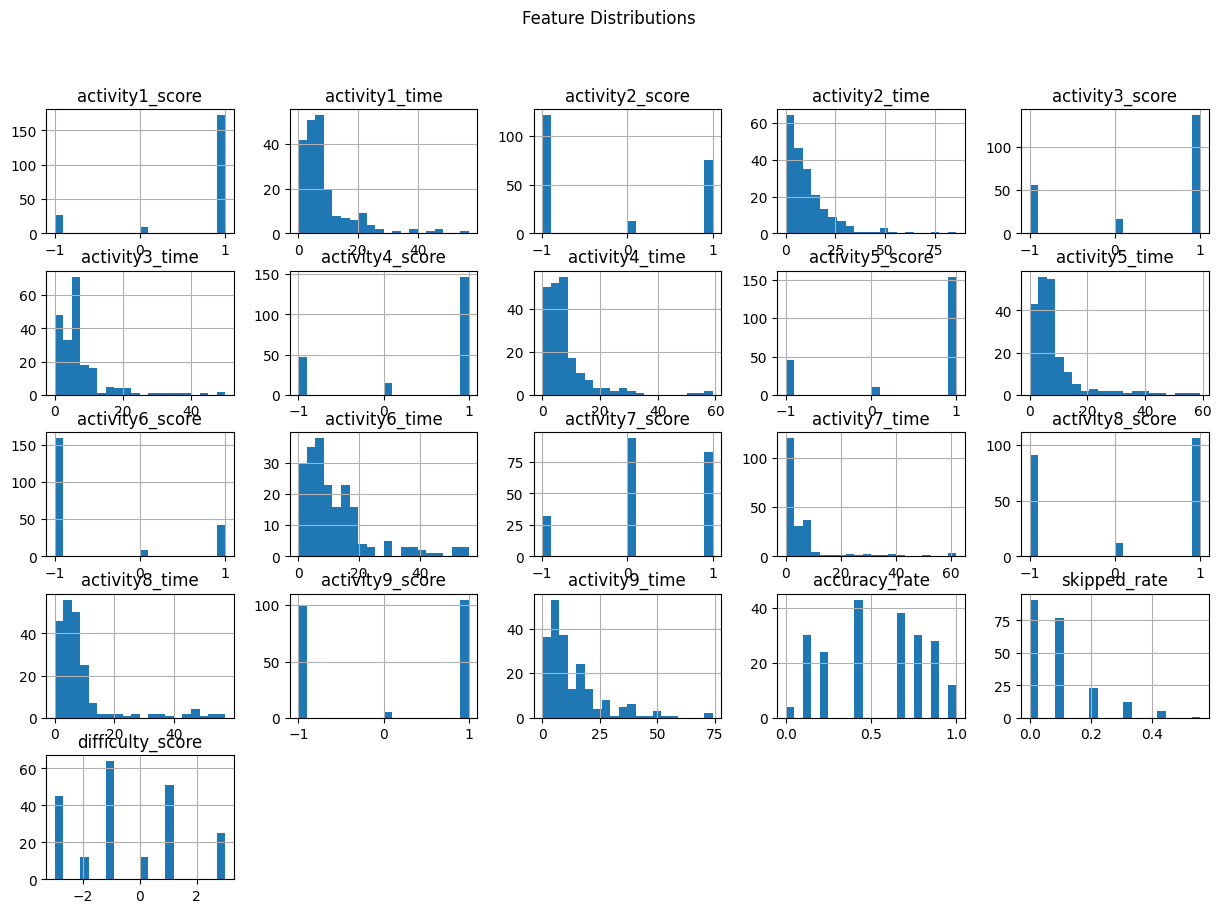

In [35]:
X.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


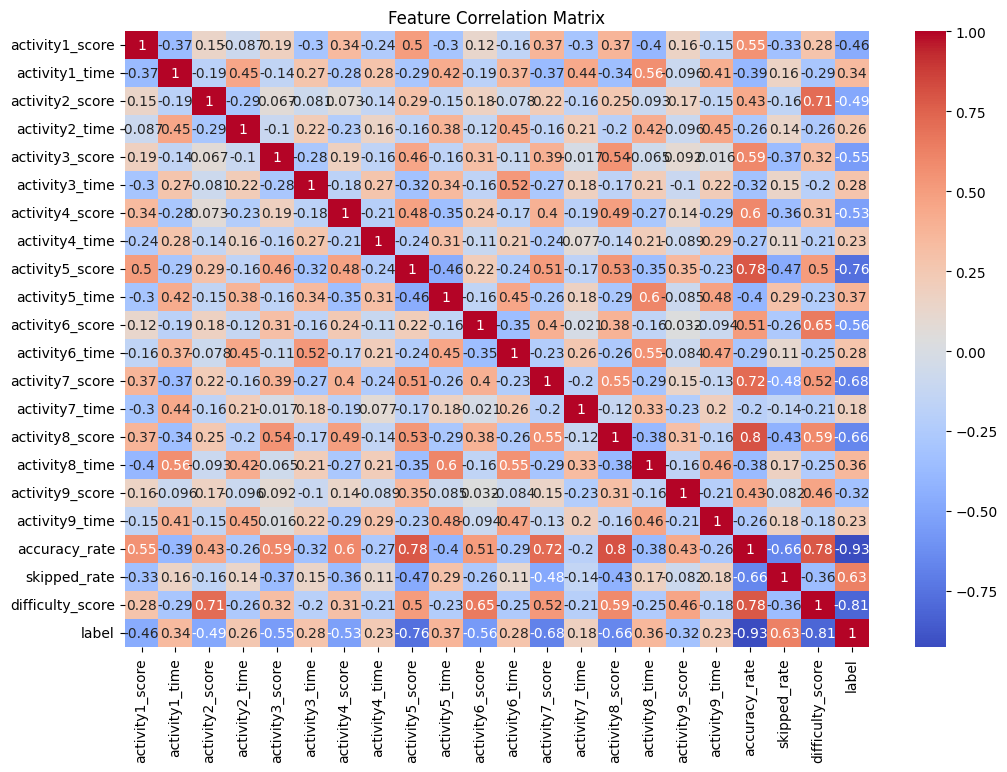

In [36]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


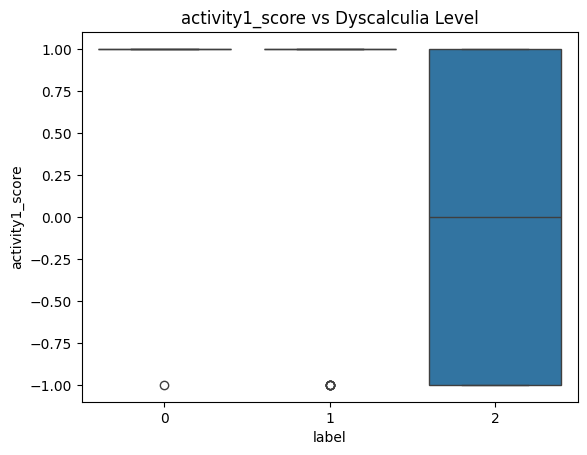

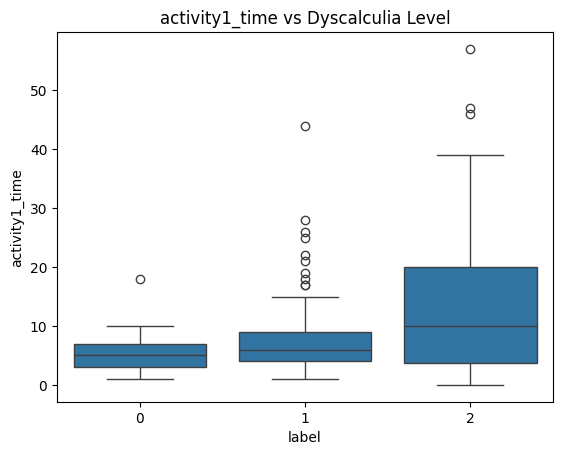

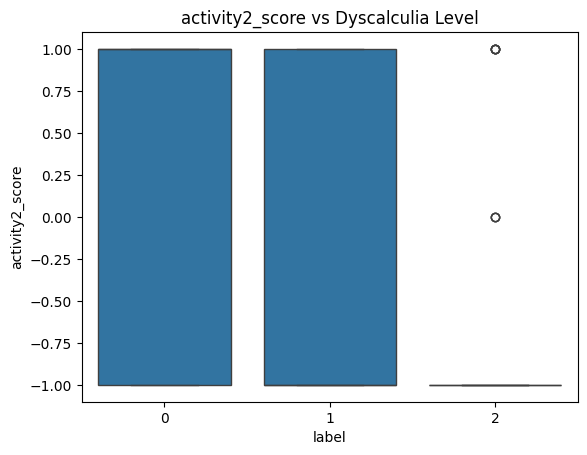

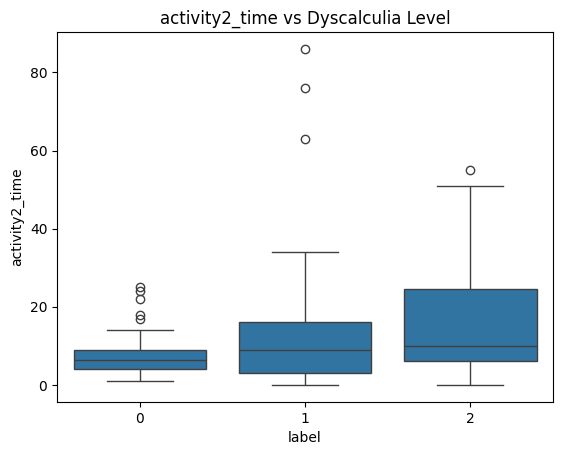

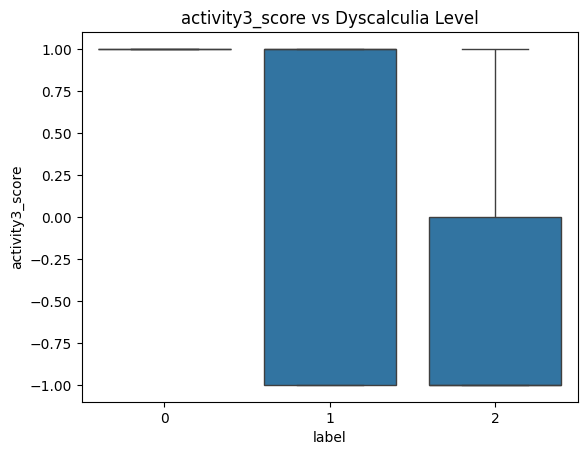

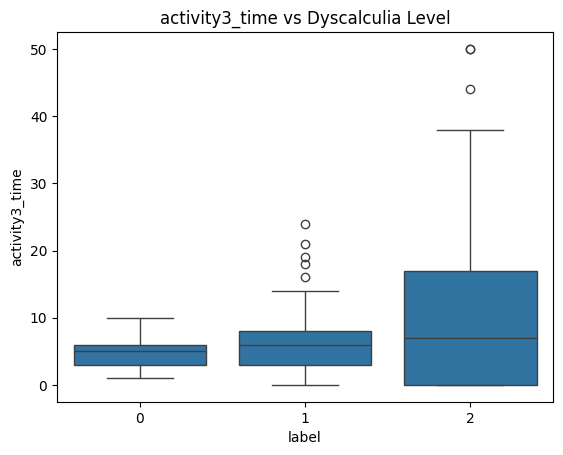

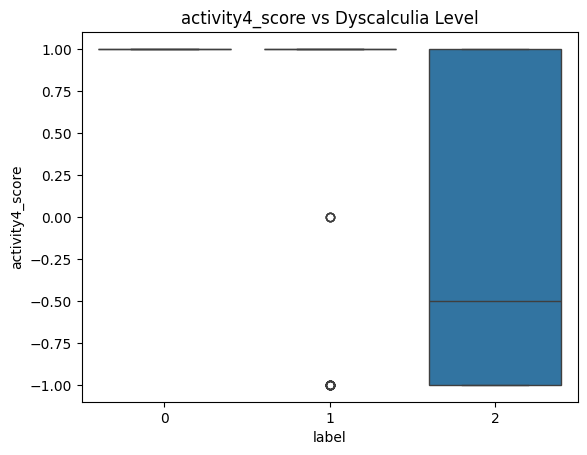

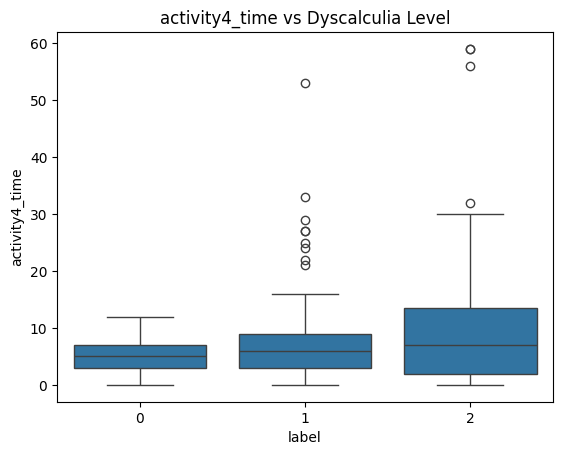

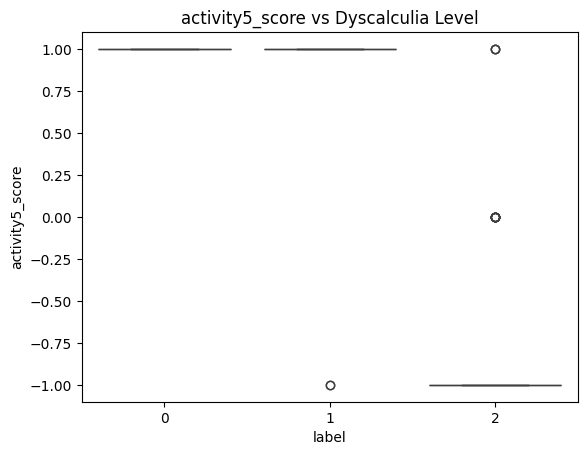

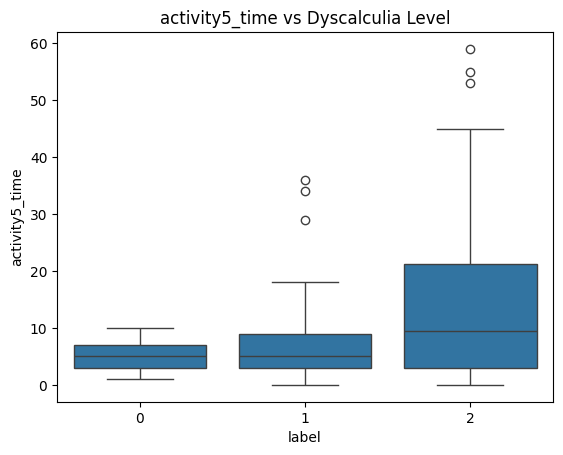

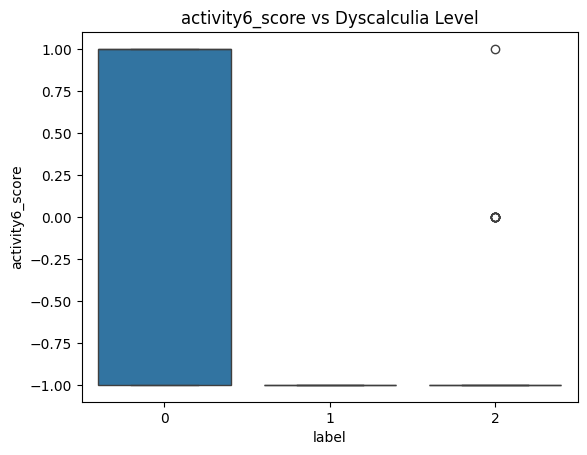

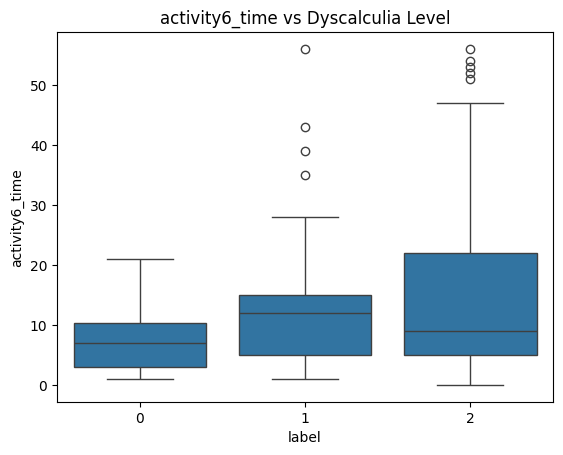

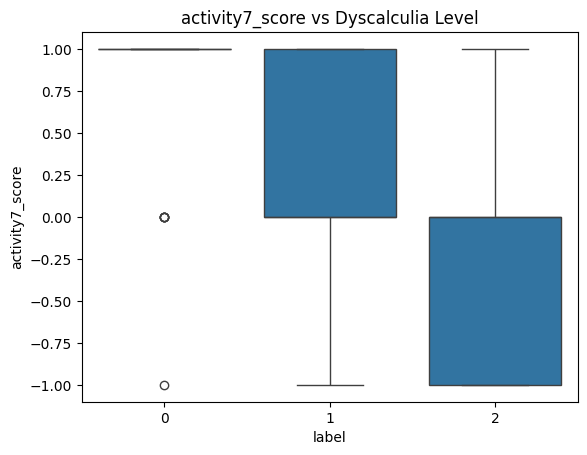

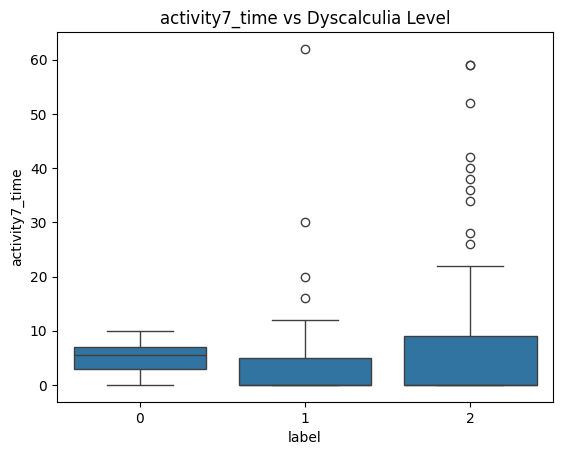

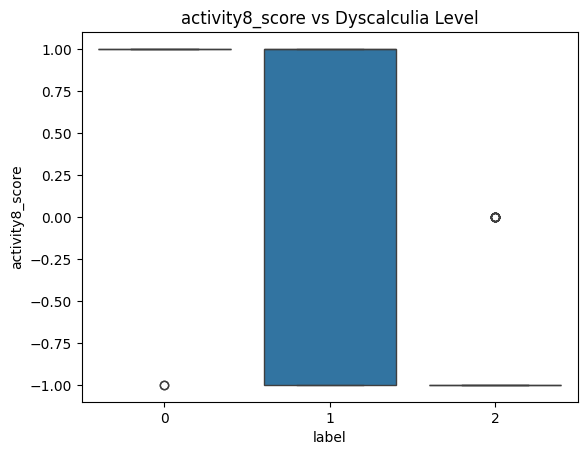

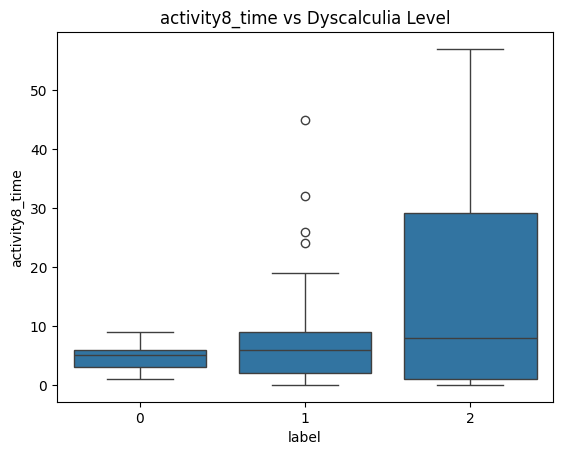

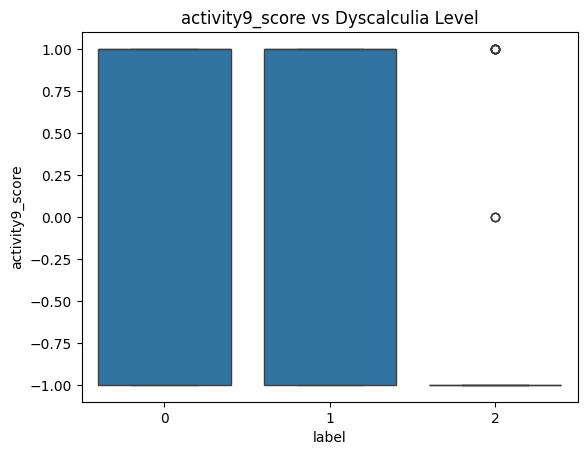

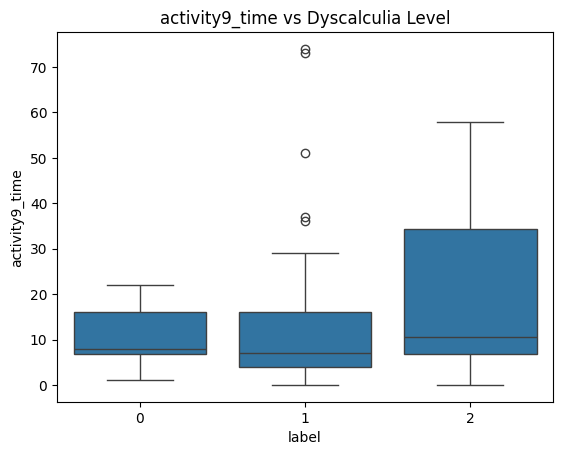

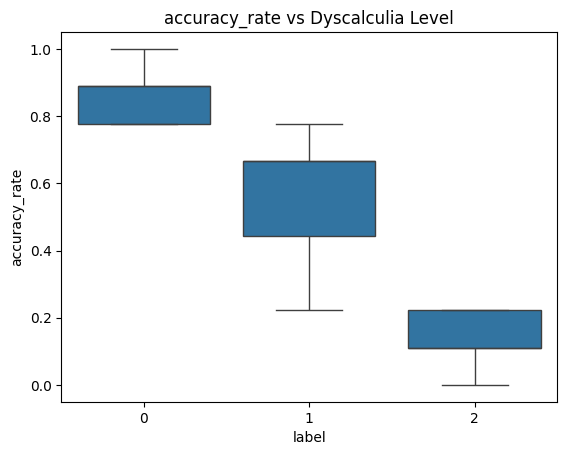

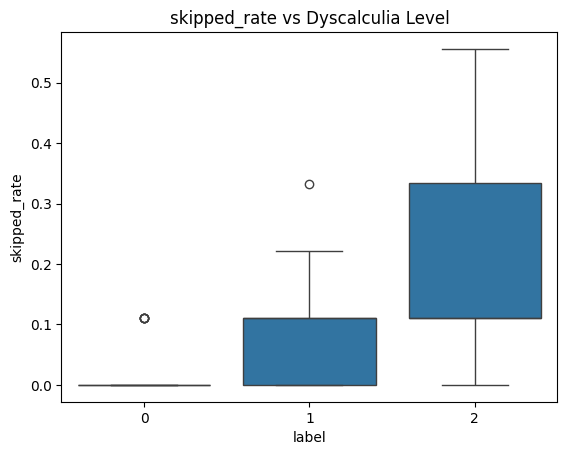

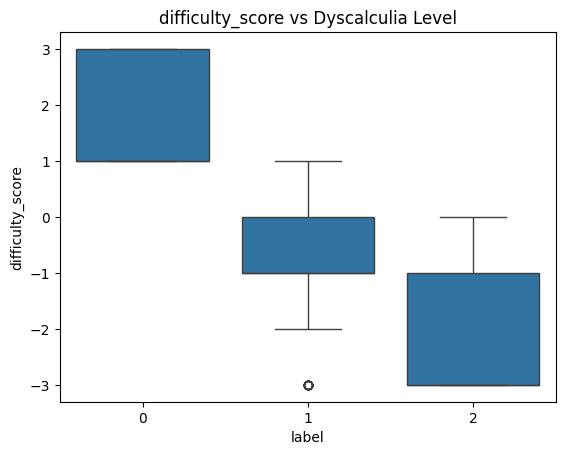

In [37]:
for col in X.columns:
    plt.figure()
    sns.boxplot(x=df["label"], y=df[col])
    plt.title(f"{col} vs Dyscalculia Level")
    plt.show()


In [14]:
df.head()

,activity1_score,activity1_time,activity2_score,activity2_time,activity3_score,activity3_time,activity4_score,activity4_time,activity5_score,activity5_time,...,activity7_score,activity7_time,activity8_score,activity8_time,activity9_score,activity9_time,accuracy_rate,skipped_rate,difficulty_score,label
0,1,3,-1,2,1,4,1,3,1,2,...,0,0,-1,3,-1,5,0.444000,0.111000,-3,1
1,-1,33,-1,50,0,0,-1,7,0,0,...,-1,28,-1,18,1,18,0.111111,0.222222,-1,2
2,1,5,1,6,1,6,1,5,1,6,...,0,0,1,4,1,17,0.778000,0.111000,1,0
3,-1,21,-1,7,-1,38,1,19,-1,3,...,-1,36,-1,35,-1,50,0.111111,0.000000,-3,2
4,1,15,-1,18,-1,12,0,0,-1,14,...,0,0,-1,9,1,8,0.222000,0.222000,-1,2


In [15]:
X = df.drop(columns=["label"])
y = df["label"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    eval_metric="mlogloss",
    random_state=42
)

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(128,64), max_iter=600, random_state=42))
])

base_models = [rf, svm, xgb, mlp]


In [18]:
from sklearn.model_selection import cross_val_score

print("Doing 5-fold cross validation:\n")

model_names = [
    "Random Forest",
    "SVM",
    "XGBoost",
    "MLP"
]

for model, name in zip(base_models, model_names):
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    print(
        f"Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name} Model]"
    )


Doing 5-fold cross validation:

Accuracy: 0.988 (+/- 0.015) [Random Forest Model]
Accuracy: 0.964 (+/- 0.035) [SVM Model]
Accuracy: 0.976 (+/- 0.022) [XGBoost Model]
Accuracy: 0.988 (+/- 0.015) [MLP Model]


/tmp/ipython-input-1777418134.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys())


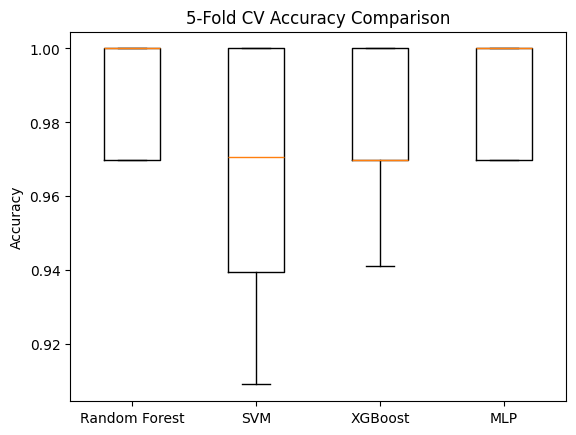

In [38]:
cv_results = {}

for model, name in zip(base_models, model_names):
    scores = cross_val_score(
        model, X_train, y_train, cv=5, scoring="accuracy"
    )
    cv_results[name] = scores

plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title("5-Fold CV Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_train = np.zeros((X_train.shape[0], len(base_models)))
oof_test = np.zeros((X_test.shape[0], len(base_models)))

for i, model in enumerate(base_models):
    oof_test_fold = np.zeros((X_test.shape[0], skf.n_splits))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]

        model.fit(X_tr, y_tr)

        oof_train[val_idx, i] = model.predict(X_val)
        oof_test_fold[:, fold] = model.predict(X_test)

    oof_test[:, i] = oof_test_fold.mean(axis=1)


In [23]:
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(oof_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
final_preds = meta_model.predict(oof_test)

print("Final Accuracy:", accuracy_score(y_test, final_preds))

print("\nClassification Report:\n")
print(classification_report(
    y_test, final_preds,
    target_names=["No Dyscalculia", "Mild Dyscalculia", "High Dyscalculia"]
))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, final_preds))


Final Accuracy: 1.0

Classification Report:

                  precision    recall  f1-score   support

  No Dyscalculia       1.00      1.00      1.00        12
Mild Dyscalculia       1.00      1.00      1.00        19
High Dyscalculia       1.00      1.00      1.00        11

        accuracy                           1.00        42
       macro avg       1.00      1.00      1.00        42
    weighted avg       1.00      1.00      1.00        42


Confusion Matrix:

[[12  0  0]
 [ 0 19  0]
 [ 0  0 11]]


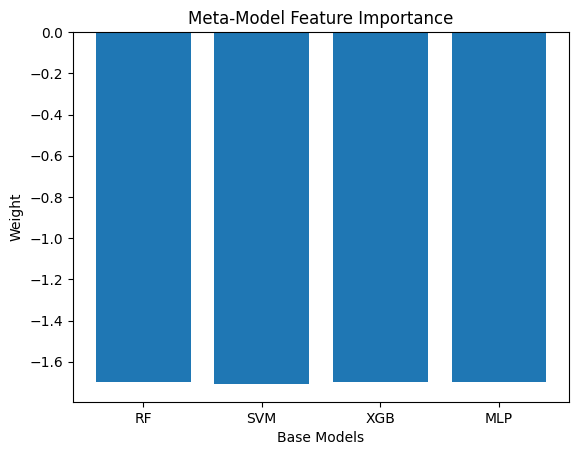

In [39]:
import pandas as pd

meta_feature_names = ["RF", "SVM", "XGB", "MLP"]
coeffs = meta_model.coef_[0]

plt.bar(meta_feature_names, coeffs)
plt.title("Meta-Model Feature Importance")
plt.ylabel("Weight")
plt.xlabel("Base Models")
plt.show()


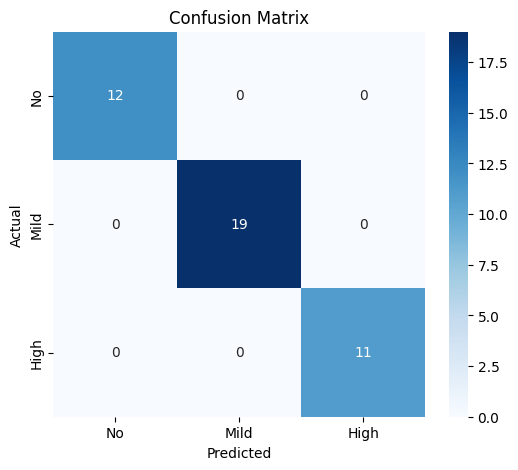

In [40]:
import seaborn as sns

cm = confusion_matrix(y_test, final_preds)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt="d",
    xticklabels=["No", "Mild", "High"],
    yticklabels=["No", "Mild", "High"],
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
for model in base_models:
    model.fit(X_train, y_train)


In [26]:
import joblib

joblib.dump(base_models, "base_models.pkl")
joblib.dump(meta_model, "meta_model.pkl")


['meta_model.pkl']

In [27]:
base_models = joblib.load("base_models.pkl")
meta_model = joblib.load("meta_model.pkl")


In [28]:
import pandas as pd

input_data = pd.DataFrame([{
    "activity1_score": 1,
    "activity2_score": 0,
    "activity3_score": 1,
    "activity4_score": 1,
    "activity5_score": 0,
    "activity6_score": -1,
    "activity7_score": 0,
    "activity8_score": -1,
    "activity9_score": -1,

    "activity1_time": 35,
    "activity2_time": 40,
    "activity3_time": 45,
    "activity4_time": 50,
    "activity5_time": 55,
    "activity6_time": 120,
    "activity7_time": 90,
    "activity8_time": 140,
    "activity9_time": 150,

    "accuracy_rate": 0.45,
    "skipped_rate": 0.22,
    "difficulty_score": 2
}])


In [29]:
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']

In [30]:
feature_names = joblib.load("feature_names.pkl")


In [31]:
input_data = input_data[feature_names]


In [32]:
import numpy as np

base_preds = np.zeros((1, len(base_models)))

for i, model in enumerate(base_models):
    base_preds[0, i] = model.predict(input_data)[0]


In [33]:
final_prediction = meta_model.predict(base_preds)[0]


In [34]:
label_map_reverse = {
    0: "No Dyscalculia",
    1: "Mild Dyscalculia",
    2: "High Dyscalculia"
}

print("Predicted Dyscalculia Level:", label_map_reverse[final_prediction])


Predicted Dyscalculia Level: Mild Dyscalculia
